In [1]:
from rlberry.manager import AgentManager, read_writer_data
from scipy.stats import norm

from sequential_test import GGST, Generator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Boundary plot

In [2]:
env_ctor = Generator     
K= 5
# we need to define some dummy parameters to be able to plot the boundary.
delta = 1 # unused for now.
n = 1 # unused for now
env_kwargs = {"laws":[norm(loc=0, scale=2), norm(loc=delta, scale=2)], 'n':n} #unused for now
env = env_ctor(**env_kwargs)

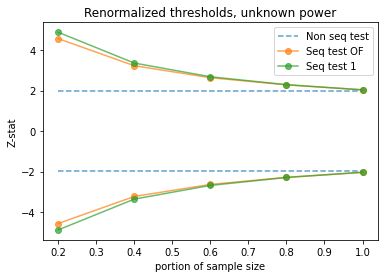

In [3]:
fig, ax = plt.subplots()

agent = GGST(env, K=K, name="OF", alpha=0.05)
agent.draw_region(ax=ax)
agent = GGST(env, K=K, name=1, alpha=0.05)
agent.draw_region(ax=ax)
plt.show()

# Show result of experiment.py

In [10]:
n = 20
K = 5
alpha = 0.05
# The following files have been generated by `experiment.py` beforehand.
name = "OF"
df1 = pd.read_csv("outputs/"+name+"_gaussian_K_"+str(K)+"_n_"+str(n)+"_alpha_"+str(alpha)+".csv")
df1["name"]="Obrien"
name = "1"
df2 = pd.read_csv("outputs/"+name+"_gaussian_K_"+str(K)+"_n_"+str(n)+"_alpha_"+str(alpha)+".csv")
df2["name"]="Obrien_alt"

In [11]:
df = pd.concat([df1, df2], ignore_index=True)

In [12]:
df.set_index(['delta', 'name']).sort_index()

mean_n_iter  pr_reject
delta name                              
0.0   Obrien           198.96      0.041
      Obrien_alt       198.24      0.060
0.5   Obrien           184.20      0.404
      Obrien_alt       185.64      0.423
1.0   Obrien           139.68      0.935
      Obrien_alt       140.56      0.934
1.5   Obrien           100.96      0.999
      Obrien_alt       103.80      1.000